# 0. What is data science

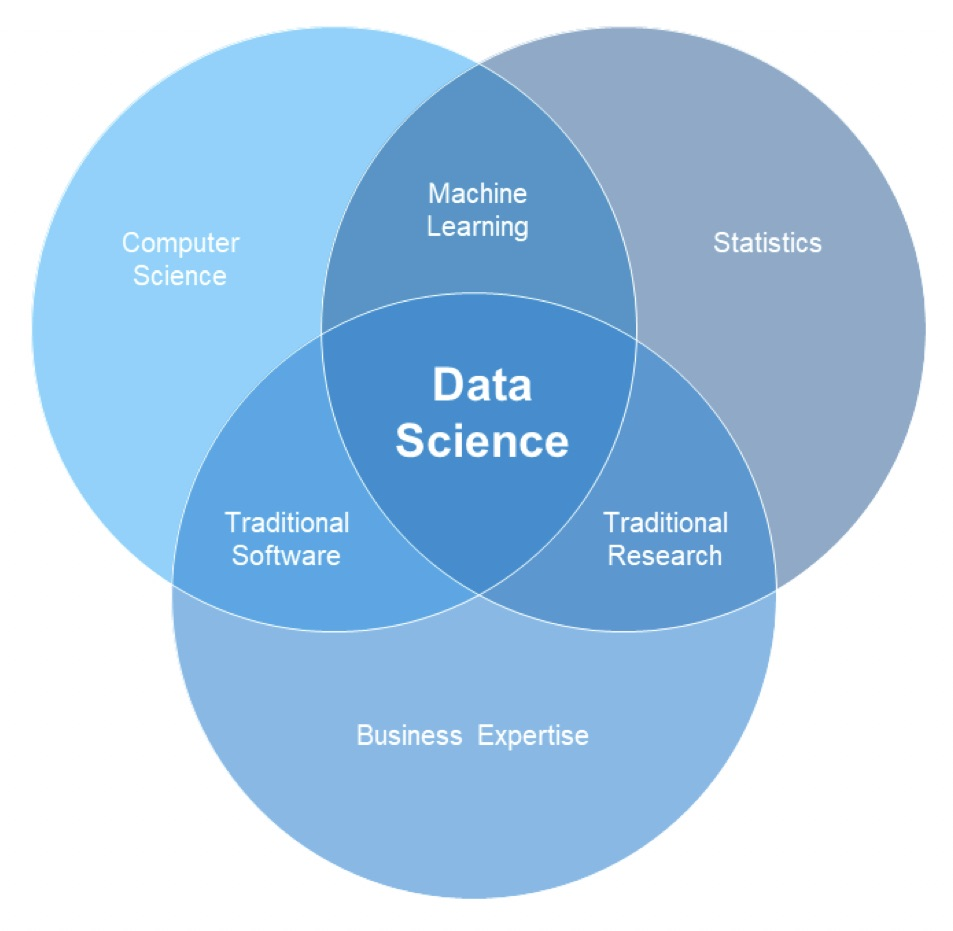

In [1]:
from IPython.display import Image
Image('data-science-venn-diagram.jpg', width=500)

# 1 Numerical computation in Python

## 1.1 Numpy + matplotlib

**Objective**: knows how to create and manipulate arrays in Python

* creating arrays (from list, arange, random)
* indexing + slices
* element-wise operations
* plotting with matplolib
* aggregations: mean/sum

### Installing and importing Python packages

In [2]:
import numpy as np

### Create and slice

In [3]:
a = np.array([1, 2, 6])
a

a[:2]

array([1, 2])

### Predefined arrays

In [4]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [5]:
np.ones(2)

array([1., 1.])

In [6]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

In [7]:
np.random.randn(5) # normally distributed

array([ 0.06136247,  2.39121068, -1.23592727, -2.16380892, -0.59319164])

In [8]:
np.random.rand(5)

array([0.12677012, 0.61659984, 0.99735809, 0.01150589, 0.58472942])

In [9]:
import matplotlib.pyplot as plt

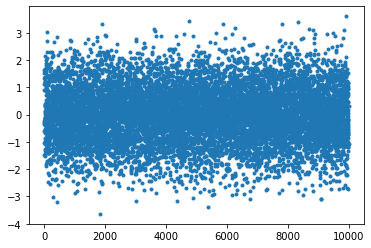

In [10]:
random_numbers = np.random.randn(10000)
plt.plot(random_numbers, '.')

(array([  13.,  143.,  548., 1606., 2588., 2694., 1609.,  639.,  135.,
          25.]),
 array([-3.64169374, -2.91697308, -2.19225242, -1.46753176, -0.7428111 ,
        -0.01809044,  0.70663022,  1.43135088,  2.15607154,  2.8807922 ,
         3.60551286]),
 <a list of 10 Patch objects>)

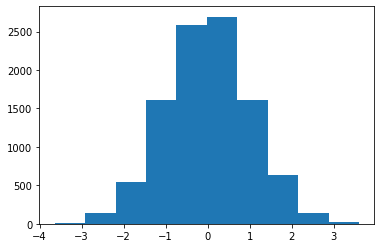

In [11]:
plt.hist(random_numbers)

### Operators on arrays

In [12]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [13]:
a + 1

array([1, 2, 3, 4, 5])

In [14]:
a * 2

array([0, 2, 4, 6, 8])

In [15]:
np.sqrt(a)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ])

In [16]:
b = np.array([1, 5, 1, 5, 1])
print(a)
print(b)
print(a + b)


[0 1 2 3 4]
[1 5 1 5 1]
[1 6 3 8 5]


### Aggregations

In [17]:
a = np.array([3, 5, 6])
np.sum(a)

14

In [18]:
np.mean(a)

4.666666666666667

In [19]:
np.sum(a) / 3

4.666666666666667

**Exercise**:

1) Calculate the sum of all values from 3 to 51 (including 51).

In [20]:
np.sum(np.arange(3, 52)) # np.arange(49) + 3


1323

2) Calculate the average of the following numbers: 1, 4, 10, -3. Subtract the average from each number.

In [21]:
a = np.array([1, 4, 10, -3])
a - np.mean(a)

array([-2.,  1.,  7., -6.])

## 1.2 Basic example: Linear regression

**Objective**: Understands the concept of statistical estimation

* least square error
* gradient descent

Exercises:
* implement MSE
* calculate derivatives/gradient

### Create and plot example dataset

In [22]:
x = np.arange(5)
y = 2 * x + 1
y = y + np.random.randn(len(y))

Text(0, 0.5, 'y')

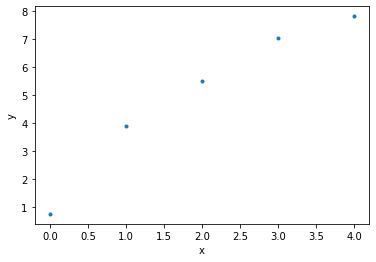

In [23]:
plt.plot(x, y, '.')
plt.xlabel('x')
plt.ylabel('y')

In [24]:
def linear(x, a, b):
    return a * x + b

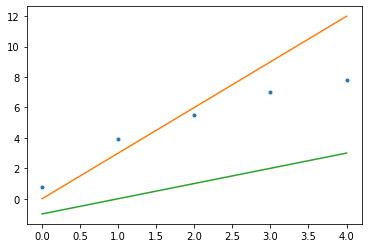

In [25]:
plt.plot(x, y, '.')
plt.plot(x, linear(x, 3, 0), '-')
plt.plot(x, linear(x, 1, -1), '-')

### Mean-square error

$$\text{MSE} = \frac{1}{N}\sum_{i=1}^N(y_{\text{pred}_i} - y_{\text{real}_i})^2$$

**Exercise**: implement MSE (mean square error)

```
def mse(y_pred, y_real):
    return ...
```

To test, check the value of MSE with the following arguments:

```
y_pred = [1, 3, 6]
y_real = [0., 2., 7.]
print(mse(y_pred, y_real))
```

In [26]:
def mse(y_pred, y_real):
    """Calcuate the mean square error."""
    y_pred = np.array(y_pred)
    y_real = np.array(y_real)
    sq_deltas = (y_pred - y_real) ** 2
    mse_value = np.mean(sq_deltas)
    return mse_value

In [27]:
y_pred = [1, 3, 6]
y_real = [0., 2., 7.]
assert mse(y_pred, y_real) == 1.

### Find linear coefficients

**Problem**: Given the `x` array (also called regressors or independent variable) and `y` array (dependent variable), find the best estimates of the value of linear coefficients `a` and `b`.

### Gradient descent

**Exercise**: Calculate gradient of the MSE with respect to the coefficients:

$$\nabla\text{MSE}=\operatorname{grad}(\text{MSE})= \left[\frac{\partial\text{MSE}}{\partial{a}}, \frac{\partial\text{MSE}}{\partial{b}}\right]$$

In [28]:
def grad(x, y, a, b):
    dmse_da = np.mean(2 * (a * x + b - y) * x ) 
    dmse_db = np.mean(2 * (a * x + b - y) * 1) 
    return dmse_da, dmse_db

In [29]:
grad(x, y, 3., 1.)

(13.0611814376205, 3.9859612772343125)

Now, iteratively update parameters according to the gradient value:

$$ a = a - \alpha \frac{\partial\text{MSE}}{da}$$
$$ b = b - \alpha \frac{\partial\text{MSE}}{db}$$

where $\alpha$ is the learning rate.

In [30]:
def apply_gradients(x, y, a, b, learning_rate):
    da, db = grad(x, y, a, b)
    a = a - learning_rate * da
    b = b - learning_rate * db
    return a, b

In [31]:
apply_gradients(x, y, 3., 1., 0.01)

(2.869388185623795, 0.9601403872276568)

In [32]:
y = 2 * x + 1

n_steps = 500
learning_rate = 0.01
a = 1.
b = 1. # initialization
mse_values = []
for i in range(n_steps):
    a, b = apply_gradients(x, y, a, b, learning_rate)
    mse_values.append(mse(linear(x, a, b), y))

In [33]:
a, b

(1.994508494280126, 1.015655080493574)

Here is the plot of the MSE during the learning.

Text(0, 0.5, 'MSE')

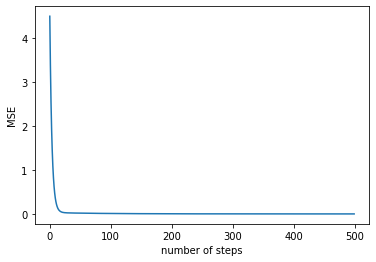

In [34]:
plt.plot(mse_values)
plt.xlabel('number of steps')
plt.ylabel("MSE")

##  1.3 Object oriented programming

**Objective**: can encapsulate concepts in classes

* attributes
* methods
* scikit-learn-like API: fit, transform methods

**Exercises**:

* name methods, attributes
* fill the gaps (function arguments)

**Definition**: Classes are data objects (like lists) that contain data ("attributes") and functions operating on these data ("methods").

### Attributes

### Methods

### Constructor (initializer)

### Implement linear regression class

In [35]:
class SimpleLinearRegression:
    
    def __init__(self, a, b, learning_rate):
        self.a = a
        self.b = b
        self.learning_rate = learning_rate
        
    def _grad(self, x, y):
        a = self.a
        b = self.b
        dmse_da = np.mean(2 * (a * x + b - y) * x ) 
        dmse_db = np.mean(2 * (a * x + b - y) * 1) 
        return dmse_da, dmse_db
    
    def _apply_gradients(self, x, y):
        a = self.a
        b = self.b
        learning_rate = self.learning_rate
        
        da, db = self._grad(x, y)
        a = a - learning_rate * da
        b = b - learning_rate * db
        return a, b
        
    def fit(self, x, y):
        """Fit the values of a, b"""
        n_steps = 100
        for i in range(n_steps):
            a, b = self._apply_gradients(x, y)
            self.a = a
            self.b = b
        return self
    
    def predict(self, x):
        """Predict targets for x"""
        return self.a * x + self.b
        

In [36]:
model = SimpleLinearRegression(3., 1., 0.1)
y = 10 * x + 5 + np.random.randn(len(x)) * 9
model.fit(x, y)

In [37]:
model.predict(x)

array([11.94858818, 19.57385227, 27.19911636, 34.82438044, 42.44964453])

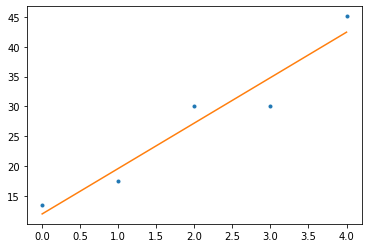

In [38]:
plt.plot(x, y, '.')
plt.plot(x, model.predict(x), '-')

In [39]:
model.a, model.b

(7.6252640884335925, 11.948588178437516)

## Quiz

1) Fill in the gaps

```
class DummyModel:
    """Create a dummy model"""
     
    def __init__(self, params): 
        self.params = params  
        
    def summarize(self):       
        """Summarize model""" 
        print("Params: {}".format(params))
        
```

* the variable `self.params` is called an attribute of the class `DummyModel`.

* `self` is an `instance` of a class `DummyModel`

* `__init__` method of a class is called a constructor,

* `params` is an argument of the the constructor,

* `summarize` is called a `method` of a class




2) What will this code do:

```
model = DummyModel()
```

a) Show the value of `self.params`.

b) Show the string "Summarize model"

c) Fit the DummyModel

d) Nothing, it will produce an error.